In [2]:
!pip install tensorflow numpy streamlit pandas matplot

  Using cached matplot-0.1.9-py2.py3-none-any.whl.metadata (241 bytes)
  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/78.6 kB ? eta -:--:--
     ------------------------------------ --- 71.7/78.6 kB 4.1 MB/s eta 0:00:01
     ---------------------------------------- 78.6/78.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 960.0 kB/s eta 0:00:09
    --------------------------------------- 0.1/8.1 MB 1.6 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.1 MB 1.3 MB/s eta 0:00:07
    ---------------------

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import imghdr

from tensorflow import keras
from tensorflow.keras import layers


In [168]:
data_dir='Plant_leaf'

In [169]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image Plant_leaf\test\cabbage
Issue with image Plant_leaf\test\guava
Issue with image Plant_leaf\test\lettuce
Issue with image Plant_leaf\test\mango
Issue with image Plant_leaf\test\mulberry
Issue with image Plant_leaf\test\neem
Issue with image Plant_leaf\test\spinach
Issue with image Plant_leaf\train\apple
Issue with image Plant_leaf\train\banana
Issue with image Plant_leaf\train\cabbage
Issue with image Plant_leaf\train\grapes
Issue with image Plant_leaf\train\guava
Issue with image Plant_leaf\train\lettuce
Issue with image Plant_leaf\train\mango
Issue with image Plant_leaf\train\mulberry
Issue with image Plant_leaf\train\neem
Issue with image Plant_leaf\train\spinach
Issue with image Plant_leaf\validation\cabbage
Issue with image Plant_leaf\validation\guava
Issue with image Plant_leaf\validation\lettuce
Issue with image Plant_leaf\validation\mango
Issue with image Plant_leaf\validation\mulberry
Issue with image Plant_leaf\validation\neem
Issue with image Plant_leaf\valid

In [170]:
data_train_path = 'Plant_leaf/train'
data_test_path = 'Plant_leaf/test'
data_val_path = 'Plant_leaf/validation'

In [171]:
img_width = 180
img_height =180 

In [172]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 531 files belonging to 10 classes.


In [173]:
data_cat = data_train.class_names

In [174]:
data_cat

['apple',
 'banana',
 'cabbage',
 'grapes',
 'guava',
 'lettuce',
 'mango',
 'mulberry',
 'neem',
 'spinach']

In [175]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 66 files belonging to 7 classes.


In [176]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 68 files belonging to 7 classes.


In [177]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

<Figure size 1000x1000 with 0 Axes>

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

In [ ]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Text(0.5, 1.0, 'Loss')

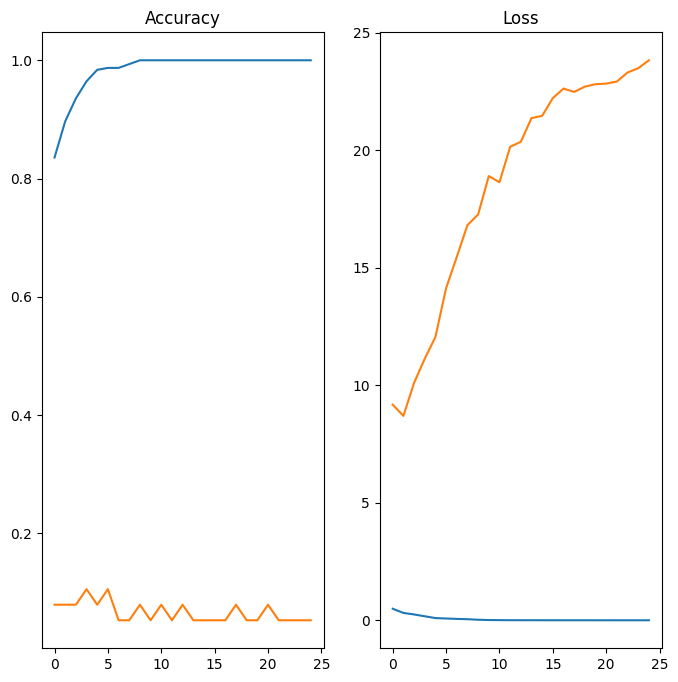

In [178]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [179]:
image = 'Image_3.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [180]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


In [181]:
score = tf.nn.softmax(predict)

In [182]:
print('plant in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

plant in image is mango with accuracy of 99.99


In [183]:
model.save('Image_classify_new.keras')